# Plotten der Bahnen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Wir plotten Bahnkurven der Form:

$$
r(\varphi) = \frac{p}{1+\epsilon\cos(\gamma\varphi)}\, .
$$


In [2]:
def rphi(phi,phi0,p,eps,gamma):
    return p/(1+eps*np.cos(gamma*(phi-phi0)))

In [3]:
# Erstelle Daten für eine Bahnkurve
# Beachte die Daten in phi, müssen an die Periodizität 
#     der Kurve angepasst werden
phi  = np.linspace(0,8*np.pi,1000)
phi0 = 0
r    = rphi(phi,phi0,1,0.5,0.5)

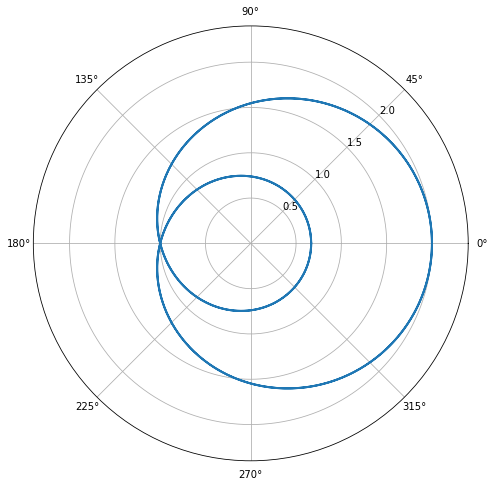

In [4]:
# Wir können Daten direkt in Polarkoordinaten plotten
# Vgl. https://matplotlib.org/examples/pylab_examples/polar_demo.html

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='polar')
ax.plot(phi, r,lw = 2)
ax.set_rmax(r.max()*1.2)
ax.set_rlabel_position(45)
ax.grid(True)
        
plt.show()

# Gravitation mit Korrekturtermen

Die Lagrangefunktion für einen Körper in einem verallgemeinerten Gravitationspotential lautet

$$
\mathcal{L} = T - V = \frac{m}{2}(\dot r^2 + r^2\dot{\varphi}^2) - V(r) 
$$

wobei das Potential $V(r)$ gegeben ist durch

$$
V(r) = -\frac{GmM}{r} - \frac{\alpha}{r^2} - \frac{\beta_1}{r^3} - \frac{\beta_2}{r^4} + \ldots
$$

Die Euler-Lagrange Gleichungen liefern die folgenden Bewegungsgleichungen

\begin{align}
0 &= m\ddot r - m r\dot\varphi^2 + \frac{\partial V(r)}{\partial r}\\
0 &= mr^2\ddot\varphi + 2mr\dot r\dot\varphi 
\end{align}

Analog zu früheren Aufgaben (siehe z.B. Jupyter-Notebook `AM_EX6.ipynb` von vergangener Woche) schreiben wir die Bewegungsgleichungen in ein System von DGL erster Ordnung um:

\begin{align}
\dot r &= v_r\\
\dot \varphi &= \omega\\
\dot v_r &= r\omega^2 - \frac{\partial V(r)}{\partial r}\\
\dot\omega &= \frac{-2v_r\omega}{r}
\end{align}

Diese DGL werden nun numerisch gelöst. Das Vorgehen ist dabei analog zum Vorgehen im Notebook `AM_EX6.ipynb`: zunächst implementieren wir die entsprechenden Ableitungen und benutzen dann die von Python zur Verfügung gestellte `odeint`-Methode.

In [8]:
# Konstanten
m     = 1
GmM   = 6.674e-11
alpha = 1
beta1  = 0
beta2 = 0
# Hinweis: 
# überpruefen Sie zunächst für beta1=beta2=0, dass Sie das analytische Ergebnis der Periheldrehung reproduzieren 
# können. Ggf. müssen Sie die Anfangswerte anpassen, damit beide Kurven aufeinander liegen.

In [18]:
# rdot,rddot,omega,omegadot
# r,rdot,phi,omega

def derivs(state,t):
    dydx    = np.zeros_like(state) 
    dydx[0] = state[1]
    dydx[1] = state[0]*(state[3]**2) - (GmM/(state[0]**2)+2*alpha/(state[0]**3)+3*beta1/(state[0]**4)+4*beta1/(state[0]**5))
    dydx[2] = state[3]
    dydx[3] = -2*state[1]*state[3]/state[0]
    return dydx

In [19]:
# Mögliche Anfangsbedingungen
# Die Lösung ist sehr sensitiv auf die Anfangsbedingungen. 
# Falls die Lösung zu nah an r=0 gelangt, kommt es außerdem schnell zu numerischen Problemen
#     es lohnt sich also ein wenig herum zu probieren 
r0      = 1
rdot0   = 1
phi0    = np.radians(45)
phi0_analytical    = np.radians(45)
phidot0 = 1

In [20]:
# Anfangsbedingungen zusammenfassen und numerisch lösen
state0 = [r0,rdot0,phi0,phidot0]
dt = 0.001 

t = np.arange(0.0, 10, dt) 
n_trj = integrate.odeint(derivs, state0, t) 

In [23]:
## Besonders ein Vergleich zur analytischen Lösung kann helfen
##   zu verstehen was durch Potentiale höherer Ordnung geschieht

def analytical(phi):
    return 1


In [24]:
# Daten erzeugen für den Plot
r_num = n_trj[...,0]
phi_num = n_trj[...,2]

phi = np.linspace(phi0,phi0 + 8*np.pi,1000)
rr = analytical(phi)

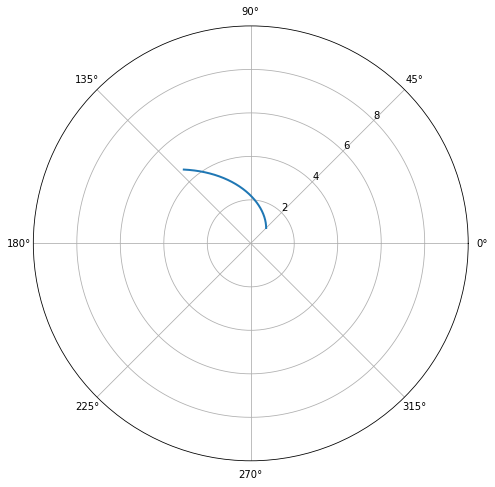

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='polar')
ax.plot(phi_num, r_num,lw = 2)
ax.set_rmax(r.max()*5)
ax.set_rlabel_position(45)
ax.grid(True)
        
plt.show()